In [1]:
class User:
    def __init__(self,name,rhythm,versatility, 
                 percussion,finger_picking, 
                 strumming):
        self.name = name
        self.rhythm  = rhythm 
        self.versatility = versatility 
        self.percussion  = percussion
        self.finger_picking = finger_picking
        self.strumming = strumming
        
    def __repr__(self):
        return f'{self.name} with a skill rating of {self.get_skill()}'
    
    def get_skill(self):
        ov = self.rhythm+self.versatility+self.percussion+self.finger_picking+self.strumming
        return ov/5 #generating a rough estimate of overall skill

In [2]:
class Song: 
    def __init__(self, title, artist, 
                 rhythm,versatility, 
                 percussion,finger_picking, 
                 strumming, genre): 
        self.title = title
        self.artist = artist
        self.rhythm  = rhythm 
        self.versatility = versatility 
        self.percussion  = percussion
        self.finger_picking = finger_picking
        self.strumming = strumming
        self.genre = genre
        
    def __repr__(self):
        return f'{self.title} by {self.artist} with a difficulty rating of {self.get_diff()}'
    
    def get_diff(self):
        ov = self.rhythm+self.versatility+self.percussion+self.finger_picking+self.strumming
        return ov/5 #generating a rough estimate of overall difficulty

In [3]:
def next_song(users,user_name,attribute,songs):
    cur_user = None
    for u in users:
        if u.name == user_name:
            cur_user = u
    
    return find_song(cur_user,attribute,songs)

def find_user(lst,user_name):   
    for u in lst:
        if u.name == user_name:
            return lst.index(u) 
    
def by_attribute(songs, attribute):
    x = sorted(songs, key = lambda r: vars(r)[attribute])
    return x
    
def find_song(user,attribute,songs):
    ats = ['rhythm','versatility','percussion',
                  'finger_picking','strumming']
    songs_now = []
    for song in songs:
        ind = 0 #setting flaw count
        for a in ats:
            if a == attribute:#if selected attribute
                if vars(song)[a] > vars(user)[a]:
                    #making sure that the selected song is of 
                    #desired difficulty for improvement
                    continue
                else:
                    ind +=1
            else:
                if vars(song)[a] <= vars(user)[a]:
                    continue
                else:
                    ind += 1
        #print(ind)
        if ind == 0:#checking if any flaws for the song
            songs_now.append(song)
        #print(songs_now)
    if len(songs_now) == 0:
        print("Sorry, we don't have any songs that fit your skill level right now.")
    elif len(songs_now) == 1:
        return songs_now[0]
    else:
        mid = len(songs)//2
        return select(songs_now,mid,attribute)

In [4]:
import random as ran
def select(songs,median,attribute):
    if len(songs) == 1:
        return songs[0]
    #base case - shouldn't happen based on find_song
    else:#we parition and recursively call select on part of the array
        part_songs = partition(songs,attribute,ran.randrange(len(songs)))
        #randomized partitioning
        songs = part_songs[0]
        a2 = part_songs[1]
        #setting points
        if a2 == median:
            return songs[a2]
            #if found
        elif a2 > median:#greater than recursion
            return select(songs[:a2],median, attribute)
        else:#less than recursion
            median = median - a2 - 1
            return select(songs[(a2+1):], median, attribute)

def partition(songs,attribute,pivot):
    i = 0
    if pivot != 0: 
        songs[0],songs[pivot] = songs[pivot],songs[0]
    for j in range(len(songs)-1):
        
        if vars(songs[j+1])[attribute] < vars(songs[0])[attribute]:
            #comparing the level for the selected attribute
            songs[j+1],songs[i+1] = songs[i+1],songs[j+1]
            i += 1 #incrementing index
            
    songs[0],songs[i] = songs[i],songs[0]
    
    return songs,i #partitioning gives us the index for our song

In [5]:
def add_song(lst,title,artist, 
                 rhythm,versatility, 
                 percussion,finger_picking, 
                 strumming, genre):
    
    lst.append(Song(title, artist, 
                 rhythm,versatility, 
                 percussion,finger_picking, 
                 strumming, genre))
def add_user(lst,name,rhythm,versatility, 
                 percussion,finger_picking, 
                 strumming):
    
    lst.append(User(name, 
                 rhythm,versatility, 
                 percussion,finger_picking, 
                 strumming))

In [6]:
songs = []
genres = ['blues','jazz','rock','pop',
          'latin','funk','disco','alternative',
          'hip hop','rap','country']

import csv
with open("songs!.csv") as csv_file:

    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    #reading the csv downloaded from spotify and translating
    #into objects of Song class
    for row in csv_reader:
        r = ran.random()
        if line == 0:
            line += 1
        elif r <= 0.5:#too much data so randomly use half(ish)
            line += 1
        else:#assigning random values
            line += 1
            title = str(row[1])
            artist = str(row[2])
            rhythm = ran.randrange(11)
            versatility = ran.randrange(11)
            percussion = ran.randrange(11)
            finger_picking = ran.randrange(11)
            strumming = ran.randrange(11)
            genre = genres[ran.randrange(len(genres))]
                  
            add_song(songs,title,artist, 
             rhythm,versatility, 
             percussion,finger_picking, 
             strumming, genre)

In [8]:
users = []    
with open("names.csv") as csv_file2:
    #list of names creating users
    csv_reader2 = csv.reader(csv_file2, delimiter=',')
    line2 = 0
    for row in csv_reader2:
        if line2 == 0:
            line2 += 1
        else:
            line += 1
            name = str(row[0])
            rhythm = ran.randrange(11)
            versatility = ran.randrange(11)
            percussion = ran.randrange(11)
            finger_picking = ran.randrange(11)
            strumming = ran.randrange(11)
                  
            add_user(users,name, 
             rhythm,versatility, 
             percussion,finger_picking, 
             strumming)

In [9]:
def sign_up(users):
    
    print('What is your name?')
    name = input()
    print('Please indicate your approximate level on a scale from 1 to 10 for these aspects of guitar:')
    print('Rhythm');r = int(input())
    print('Percussion');p = int(input())
    print('Finger Picking');fp = int(input())
    print('Strumming');s = int(input())
    print('How versatile are you?');v = int(input())
    
    add_user(users,name,r,v,p,fp,s)
    
    return "You're all set to find the song you should practice next!"

In [10]:
ats = ['rhythm','versatility','percussion',
                  'finger_picking','strumming']
import time
def time_test(n,songs,ats):
    times = []
    for u in range(n):
        user = users[u]
        name = user.name
        attribute = ats[ran.randrange(1,len(ats))]
        #random testing attribute
        start = time.time()
        next_song(users,name,attribute,songs)#timing
        speed = time.time() - start
        times.append(speed)#time list
    return sum(times)/n #average time

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def song_test(n,ats):
    song_list = songs[0:n]
    tim = time_test(10,song_list,ats)
    return tim

times1 = []
i_s = []
for i in range(12000,25000,200):
    i_s.append(i)
    times1.append(song_test(i,ats))

y=0.000005x -0.028434


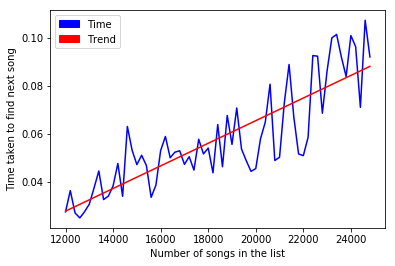

In [12]:
plt.plot(i_s,times1,color = "blue")
plt.xlabel("Number of songs in the list")
plt.ylabel("Time taken to find next song")
z = np.polyfit(i_s, times1, 1)
p = np.poly1d(z) #finding regression line
plt.plot(i_s,p(i_s),"-",color = "red")
# the line equation:
print("y=%.6fx %.6f"%(z[0],z[1]))
import matplotlib.patches as m
time = m.Patch(color='blue', label='Time')
line = m.Patch(color='red', label = 'Trend')
plt.legend(handles=[time, line])#legend
plt.show()

In [13]:
next_song(users,'Olive','strumming',songs)

When I Was Your Man by Bruno Mars with a difficulty rating of 4.8

Interestingly enough, I had Olive try the functionality out and she was suggested a song that I have performed in India. Also, it was a song I really had to practice my strumming for - randomization is my friend today!

In [21]:
######DEMO######
fav_songs = []
the_user = []
add_user(the_user,'Newbie',1,1,1,1,1)

In [ ]:
add_song(fav_songs,'Cyclone','Sticky Fingers',3,3,1,4,4,'Alternative')
add_song(fav_songs,'Follow You to Virgie','Tyler Childers',2,3,1,4,3, 'Country')
add_song(fav_songs,'Hey ya!','Obadiah Parker (Orinally Outkast)',3,2,1,2,4,'Folk')
add_song(fav_songs,'Wish You Were Here','Pink Floyd',4,4,1,4,5,'Rock')
add_song(fav_songs,'7','Catfish and the Bottlemen',4,4,1,2,6,'Rock')
add_song(fav_songs,'Read My Mind','The Killers',3,3,1,2,4,'Alternative')
add_song(fav_songs,'Feeling Whitney','Post Malone',4,4,1,4,1,'Folk')
add_song(fav_songs,"Ain't No Sunshine",'Bill Withers',3,4,2,5,2,'Soul')
add_song(fav_songs,"Stay",'Post Malone',3,3,1,3,4,'Folk')
add_song(fav_songs,'Into the Sky','Wes Whelan',2,2,1,2,4,'Folk')
for i in fav_songs:
    print(i)